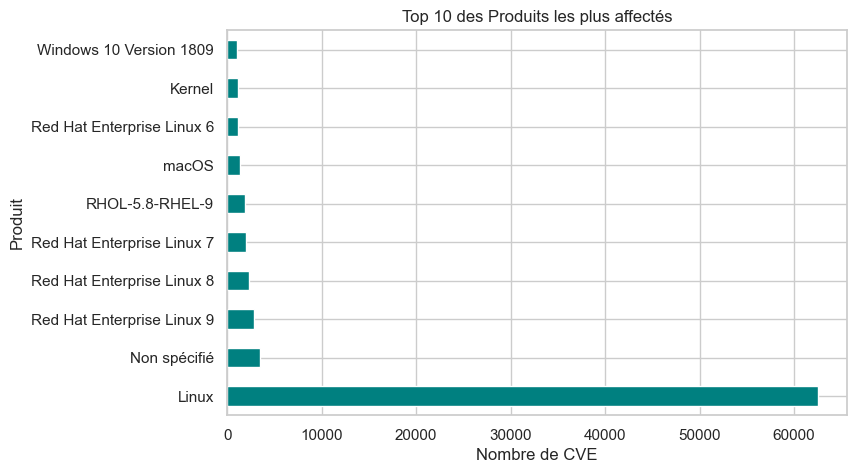

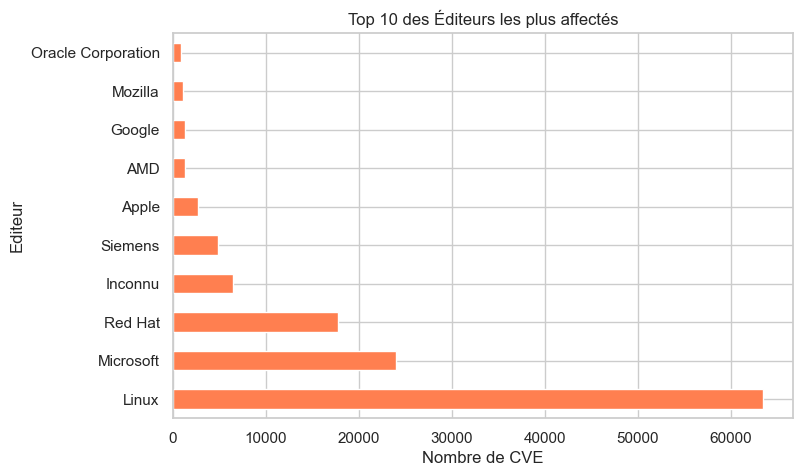

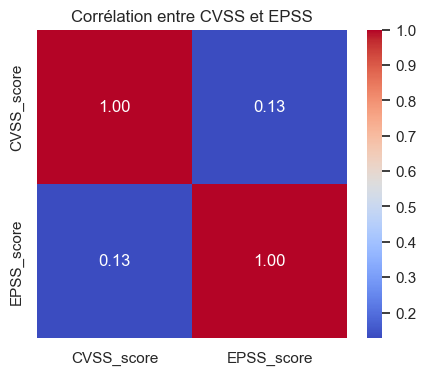

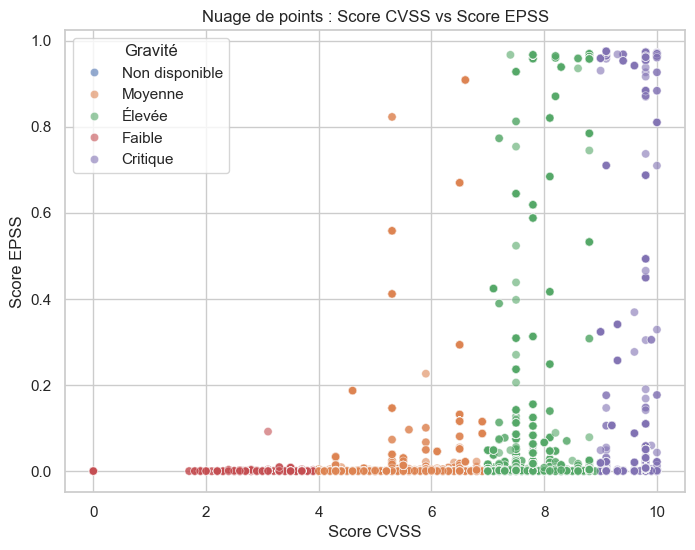

In [7]:
# Étape 5 – Visualisation et Interprétation des CVE enrichies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du fichier CSV mis à jour
df = pd.read_csv("DataFrame.csv")

# Nettoyage de base
df['CVSS_score'] = pd.to_numeric(df['CVSS_score'], errors='coerce')
df['EPSS_score'] = pd.to_numeric(df['EPSS_score'], errors='coerce')
df['Date_publication'] = pd.to_datetime(df['Date_publication'], errors='coerce')
df['CWE'] = df['CWE'].fillna("Non classé")
df['Editeur'] = df['Editeur'].fillna("Inconnu")
df['Produit'] = df['Produit'].fillna("Non spécifié")

# Gravité CVSS

def score_to_severity(score):
    if pd.isna(score):
        return "Non disponible"
    elif score >= 9:
        return "Critique"
    elif score >= 7:
        return "Élevée"
    elif score >= 4:
        return "Moyenne"
    else:
        return "Faible"

df['Base_Severity'] = df['CVSS_score'].apply(score_to_severity)

# Classement des produits et éditeurs les plus affectés
plt.figure(figsize=(8,5))
df['Produit'].value_counts().head(10).plot(kind='barh', color='teal')
plt.title("Top 10 des Produits les plus affectés")
plt.xlabel("Nombre de CVE")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
df['Editeur'].value_counts().head(10).plot(kind='barh', color='coral')
plt.title("Top 10 des Éditeurs les plus affectés")
plt.xlabel("Nombre de CVE")
plt.grid(True)
plt.show()

# Heatmap de corrélation CVSS / EPSS
plt.figure(figsize=(5,4))
sns.heatmap(df[['CVSS_score', 'EPSS_score']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre CVSS et EPSS")
plt.show()

# Nuage de points CVSS vs EPSS
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='CVSS_score', y='EPSS_score', hue='Base_Severity', alpha=0.6)
plt.title("Nuage de points : Score CVSS vs Score EPSS")
plt.xlabel("Score CVSS")
plt.ylabel("Score EPSS")
plt.grid(True)
plt.legend(title='Gravité')
plt.show()

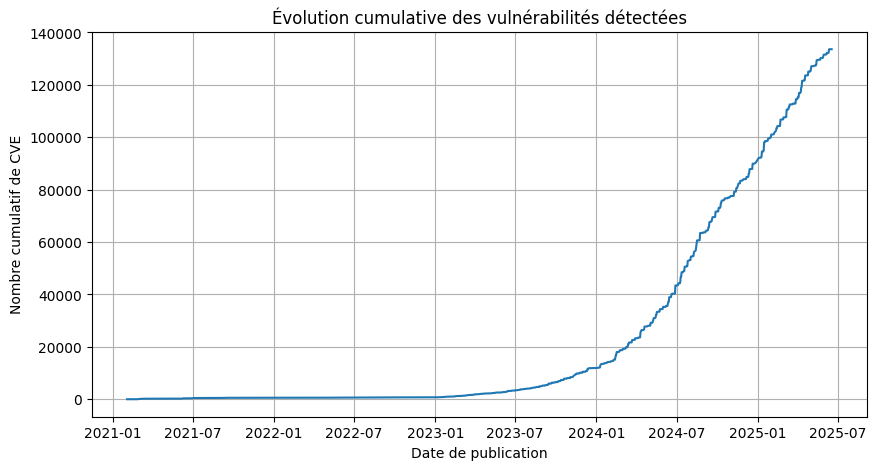

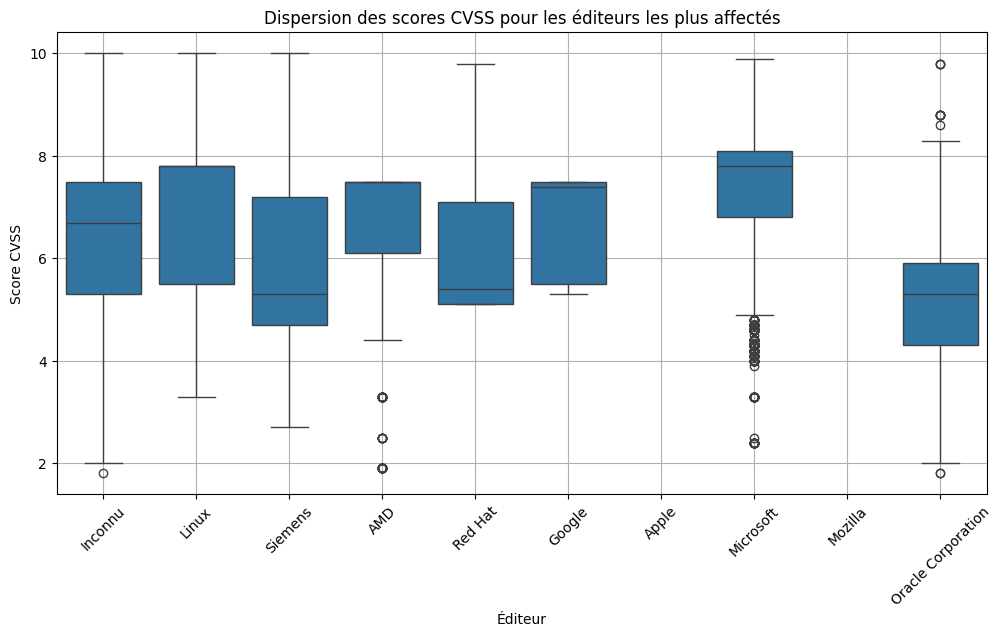

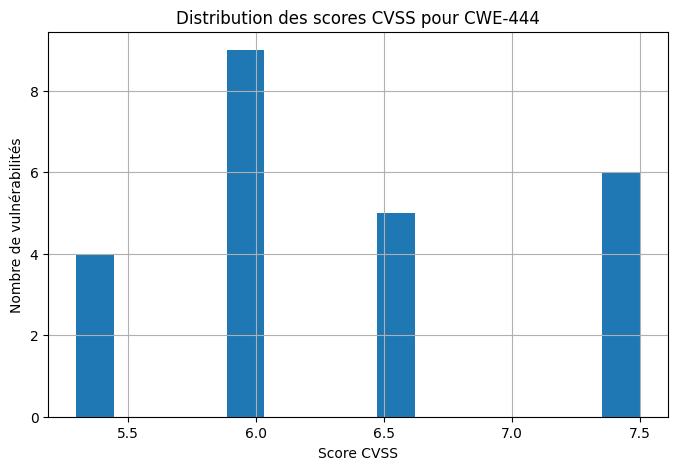

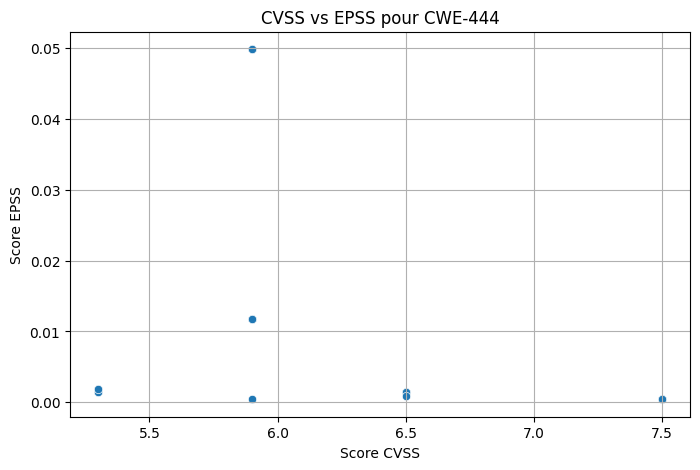

In [3]:
# Étape 5 – Visualisation et Interprétation des CVE enrichies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement du fichier CSV mis à jour
df = pd.read_csv("DataFrame.csv")

# Nettoyage de base
df['CVSS_score'] = pd.to_numeric(df['CVSS_score'], errors='coerce')
df['EPSS_score'] = pd.to_numeric(df['EPSS_score'], errors='coerce')
df['Date_publication'] = pd.to_datetime(df['Date_publication'], errors='coerce')
df['CWE'] = df['CWE'].fillna("Non classé")
df['Editeur'] = df['Editeur'].fillna("Inconnu")
df['Produit'] = df['Produit'].fillna("Non spécifié")

# Gravité CVSS

def score_to_severity(score):
    if pd.isna(score):
        return "Non disponible"
    elif score >= 9:
        return "Critique"
    elif score >= 7:
        return "Élevée"
    elif score >= 4:
        return "Moyenne"
    else:
        return "Faible"

df['Base_Severity'] = df['CVSS_score'].apply(score_to_severity)

# Courbe cumulative des vulnérabilités dans le temps
plt.figure(figsize=(10,5))
df['Date_publication'].dropna().dt.date.value_counts().sort_index().cumsum().plot()
plt.title("Évolution cumulative des vulnérabilités détectées")
plt.xlabel("Date de publication")
plt.ylabel("Nombre cumulatif de CVE")
plt.grid(True)
plt.show()

# Boxplot CVSS par éditeur (top 10)
top_editeurs = df['Editeur'].value_counts().head(10).index
df_top = df[df['Editeur'].isin(top_editeurs)]
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x='Editeur', y='CVSS_score')
plt.title("Dispersion des scores CVSS pour les éditeurs les plus affectés")
plt.xlabel("Éditeur")
plt.ylabel("Score CVSS")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Visualisation spécifique d'un CWE donné 
selected_cwe = "CWE-444"
df_cwe = df[df['CWE'] == selected_cwe]
plt.figure(figsize=(8,5))
df_cwe['CVSS_score'].hist(bins=15)
plt.title(f"Distribution des scores CVSS pour {selected_cwe}")
plt.xlabel("Score CVSS")
plt.ylabel("Nombre de vulnérabilités")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_cwe, x='CVSS_score', y='EPSS_score')
plt.title(f"CVSS vs EPSS pour {selected_cwe}")
plt.xlabel("Score CVSS")
plt.ylabel("Score EPSS")
plt.grid(True)
plt.show()

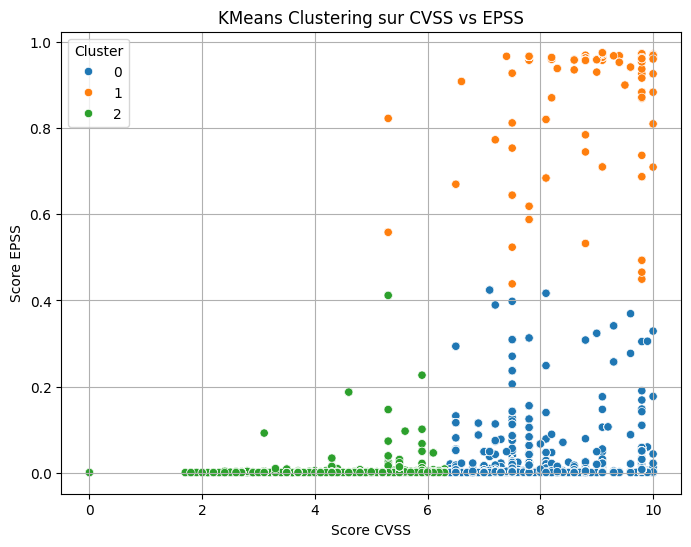

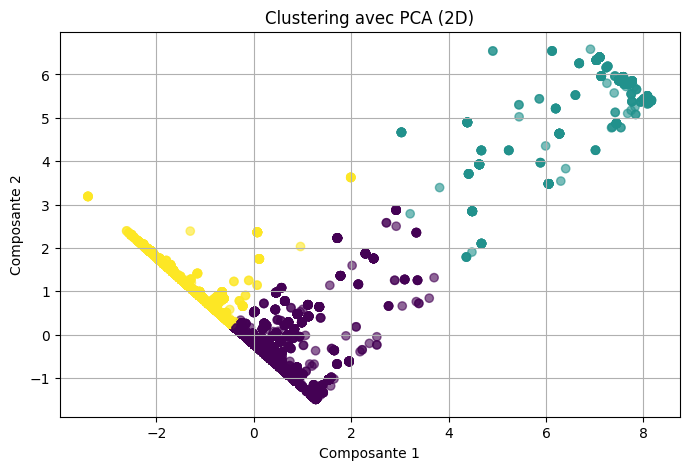


=== Classification Report ===
              precision    recall  f1-score   support

    Critique       0.83      0.60      0.69       446
      Faible       0.87      0.44      0.59       414
     Moyenne       0.77      0.49      0.60      4044
      Élevée       0.72      0.92      0.81      6634

    accuracy                           0.74     11538
   macro avg       0.80      0.61      0.67     11538
weighted avg       0.75      0.74      0.72     11538


=== Matrice de Confusion ===
[[ 266    5   35  140]
 [   4  184   61  165]
 [  30   12 1974 2028]
 [  20   10  510 6094]]


In [4]:
# Étape 5 – Visualisation et Interprétation des CVE enrichies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Chargement du fichier CSV mis à jour
df = pd.read_csv("DataFrame.csv")

# Nettoyage de base
df['CVSS_score'] = pd.to_numeric(df['CVSS_score'], errors='coerce')
df['EPSS_score'] = pd.to_numeric(df['EPSS_score'], errors='coerce')
df['Date_publication'] = pd.to_datetime(df['Date_publication'], errors='coerce')
df['CWE'] = df['CWE'].fillna("Non classé")
df['Editeur'] = df['Editeur'].fillna("Inconnu")
df['Produit'] = df['Produit'].fillna("Non spécifié")

# Gravité CVSS

def score_to_severity(score):
    if pd.isna(score):
        return "Non disponible"
    elif score >= 9:
        return "Critique"
    elif score >= 7:
        return "Élevée"
    elif score >= 4:
        return "Moyenne"
    else:
        return "Faible"

df['Base_Severity'] = df['CVSS_score'].apply(score_to_severity)

# Machine Learning - Modèle non supervisé : Clustering KMeans sur CVSS et EPSS
features = df[['CVSS_score', 'EPSS_score']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
features['Cluster'] = kmeans.labels_

plt.figure(figsize=(8,6))
sns.scatterplot(data=features, x='CVSS_score', y='EPSS_score', hue='Cluster', palette='tab10')
plt.title("KMeans Clustering sur CVSS vs EPSS")
plt.xlabel("Score CVSS")
plt.ylabel("Score EPSS")
plt.grid(True)
plt.show()

# Réduction de dimension avec PCA (optionnel)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,5))
plt.scatter(pca_result[:,0], pca_result[:,1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.title("Clustering avec PCA (2D)")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.grid(True)
plt.show()

# Machine Learning - Modèle supervisé : Prédiction de la gravité CVSS
# On encode la gravité CVSS comme cible
ml_df = df[['CVSS_score', 'EPSS_score', 'Base_Severity']].dropna()
ml_df = ml_df[ml_df['Base_Severity'] != 'Non disponible']

X = ml_df[['EPSS_score']]
y = ml_df['Base_Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("\n=== Matrice de Confusion ===")
print(confusion_matrix(y_test, y_pred))

In [1]:
#import des librairies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pour un meilleur style de plot
sns.set(style="whitegrid")


#Chargement du fichier CSV 
df = pd.read_csv("DataFrame.csv", encoding="utf-8")

#Aperçu
df.head()


# Comptage des données manquantes au sens large
def compter_manquants(col):
    return ((col.isna()) | (col == "") | (col == "Non disponible")).sum()

# Application à chaque colonne
manquants = df.apply(compter_manquants)

# Affichage
print("Nombre de données manquantes par colonne (NaN, vide, ou 'Non disponible') :\n")
print(manquants.sort_values(ascending=False))

Nombre de données manquantes par colonne (NaN, vide, ou 'Non disponible') :

CVSS_score            95050
Base_Severity         95050
CWE                   76929
CWE_description       67944
Versions_affectees    29349
Editeur                6512
Produit                3526
EPSS_score              255
ID_ANSSI                  0
Titre_ANSSI               0
Type                      0
Date_publication          0
CVE_ID                    0
Lien_bulletin             0
Description               0
dtype: int64
